## Aula 15: Regressão e autoregressão

## 1. Correlação e autocorrelação

**Correlação**

![](https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from pandas_datareader.data import DataReader

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

https://finance.yahoo.com/

**Regressão**

- Ordinary Least Squares (OLS)

![](https://qph.fs.quoracdn.net/main-qimg-3b0d7655ac76edf1241f97015ee755b4)

In [2]:
import statsmodels.api as sm

## 2. Fundamentos de séries temporais

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
st_petr4 = 'PETR4.SA'
st_ciel3 = 'CIEL3.SA'

df_st = pd.DataFrame()

stocks = [st_petr4, st_ciel3]
for stock in stocks:
    df_st[stock]=DataReader(stock, data_source='yahoo',
                            start='2010-1-1')['Adj Close']

In [5]:
df_st

,PETR4.SA,CIEL3.SA
Date,,
2010-01-04,26.560329,5.238293
2010-01-05,26.332588,5.201824
2010-01-06,26.688438,5.188560
2010-01-07,26.439356,5.311231
2010-01-08,26.297005,5.244923
...,...,...
2021-11-01,28.000000,2.240000
2021-11-03,26.850000,2.320000
2021-11-04,26.000000,2.350000


In [6]:
df_st.dropna(inplace=True)

In [7]:
df_st

,PETR4.SA,CIEL3.SA
Date,,
2010-01-04,26.560329,5.238293
2010-01-05,26.332588,5.201824
2010-01-06,26.688438,5.188560
2010-01-07,26.439356,5.311231
2010-01-08,26.297005,5.244923
...,...,...
2021-11-01,28.000000,2.240000
2021-11-03,26.850000,2.320000
2021-11-04,26.000000,2.350000


<AxesSubplot:xlabel='Date'>

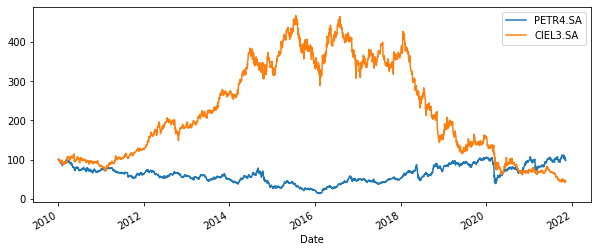

In [8]:
(df_st / df_st.iloc[0] * 100).plot(figsize=(10, 4))

In [9]:
df_st = df_st.pct_change().dropna()

In [10]:
df_st

,PETR4.SA,CIEL3.SA
Date,,
2010-01-05,-0.008574,-0.006962
2010-01-06,0.013514,-0.002550
2010-01-07,-0.009333,0.023643
2010-01-08,-0.005384,-0.012484
2010-01-11,-0.003247,-0.013906
...,...,...
2021-11-01,0.031308,0.022831
2021-11-03,-0.041071,0.035714
2021-11-04,-0.031657,0.012931


<AxesSubplot:xlabel='PETR4.SA', ylabel='CIEL3.SA'>

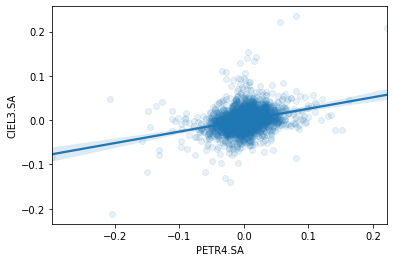

In [11]:
sns.regplot(data=df_st, x='PETR4.SA', y='CIEL3.SA',
            scatter_kws={'alpha':0.1})

In [12]:
df_st.corr()

,PETR4.SA,CIEL3.SA
PETR4.SA,1.000000,0.306666
CIEL3.SA,0.306666,1.000000


In [13]:
np.random.random_sample(10)-0.5

array([-0.49207698,  0.23711079,  0.04909087,  0.49874527,  0.29361887,
       -0.09109416, -0.4473261 , -0.27599193, -0.04426835,  0.1441376 ])

In [14]:
df_teste = pd.DataFrame()
n = 100
df_teste['var1'] = np.array(list(range(0, n*n, n)))+(np.random.random_sample(n)-0.5)*np.random.randint(n)
df_teste['var2'] = np.array(list(range(n)))*-1+(np.random.random_sample(n)-0.5)*np.random.randint(n)
df_teste.corr()

,var1,var2
var1,1.000000,-0.784343
var2,-0.784343,1.000000


In [15]:
df_teste

,var1,var2
0,25.194371,30.359770
1,73.562373,-24.841751
2,203.460543,37.416281
3,299.925005,-3.064799
4,383.205419,-28.639057
...,...,...
95,9487.330503,-123.140382
96,9610.829365,-85.648039
97,9679.953881,-123.914098
98,9838.063635,-124.125247


**ACF - AutoCorrelation Function - autocorrelação**

Medida pela correlação entre a série temporal com a cópia defasada dela mesma.

**PACF - Autocorrelação parcial**

Ao contrário da autocorrelação, remove efeito e dados temporais intermediarios. Ou seja, os passos de tempo entre o passo atual e o passo t-q são desconsiderados na PACF.

![](https://i1.wp.com/www.business-science.io/assets/lag-explanation.PNG?w=584)

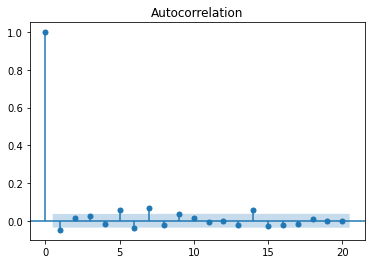

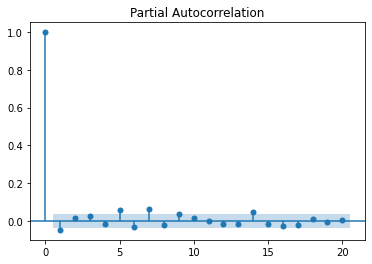

In [21]:
plot_acf(df_st['PETR4.SA'], lags=20)
plt.show()

plot_pacf(df_st['PETR4.SA'], lags=20)
plt.show()

Intervalos de confiança são desenhados como cones e setados por default para 95% de confiança. Ou seja, valores fora do cone são muito provavelmente correlações efetivas, e não coincidências.

**Estacionaridade**

- uma série temporal é dita estacionária quando ela se desenvolve no tempo aleatoriamente ao redor de um valor constante, refletindo alguma forma de equilíbrio estável

![](https://miro.medium.com/max/2580/1*tkx0_wwQ2JT7pSlTeg4yzg.png)

## White noise

- média constante = 0
- variância constante
- autocorrelação zero em todas lags => sazonalidade inexistente

**Importância**
$$y_{t} = sinal + ruido$$

- Sinal => AR, MA...
- Ruído => Parte totalmente imprevisível

- Modelo bom => resíduo é ruído branco

**Testes**
- Visual
- Rolling window => verificar o movimento do desvio padrão e da média no tempo
- Correlações => ACF dentro do intervalo de confiança

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/White-Noise-Series-Line-Plot.png)

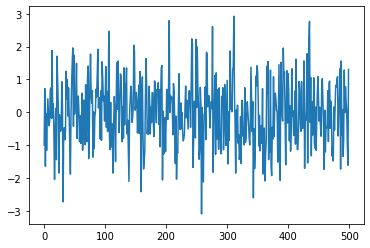

In [22]:
noise = np.random.normal(loc=0, scale=1, size=500)
plt.plot(noise)

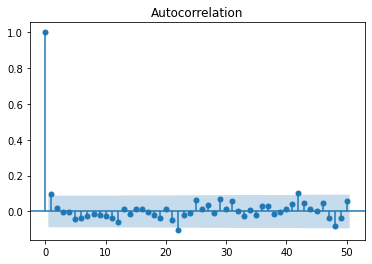

In [24]:
ac = plot_acf(noise, lags=50)

**Random walk**

- preço de hoje = preço de ontem + ruído
$$P_t = P_{t-1} + \epsilon_t$$
- mudança de preço é ruído branco
$$P_t - P_{t-1} = \epsilon_t$$
- não é possível prever um random walk
- melhor previsão do preço de amanhã é o preço de hoje
- random walk com drift
$$P_t = \mu + P_{t-1} + \epsilon_t$$
- mudança de preço é ruído branco com média $\mu$
$$P_t - P_{t-1} = \mu + \epsilon_t$$

**teste estatístico para random walk**
- teste de regressão para random walk
$$P_t =\alpha + \beta P_{t-1} \epsilon_t$$

- equivalente com
$$P_t - P_{t-1}=\alpha + \beta P_{t-1} \epsilon_t$$

- teste de Dickey–Fuller
    - random walk
$$H_0: \beta = 0$$
    - não é random walk
$$H_1: \beta < 0$$
![]()

- random walk são exemplos de séries não estacionárias

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/Random-Walk-Line-Plot.png)

- séries sazonais também não são estacionárias

![](https://anomaly.io/wp-content/uploads/2015/12/multiplicative-model.png)

- transformando séreis não estacionárias em estacionárias

![image.png](../images/06_01.png)

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
df_st.columns

Index(['PETR4.SA', 'CIEL3.SA'], dtype='object')

In [27]:
df_st['PETR4.SA']

Date
2010-01-05   -0.008574
2010-01-06    0.013514
2010-01-07   -0.009333
2010-01-08   -0.005384
2010-01-11   -0.003247
                ...   
2021-11-01    0.031308
2021-11-03   -0.041071
2021-11-04   -0.031657
2021-11-05   -0.005769
2021-11-08    0.010445
Name: PETR4.SA, Length: 2934, dtype: float64

<AxesSubplot:xlabel='Date'>

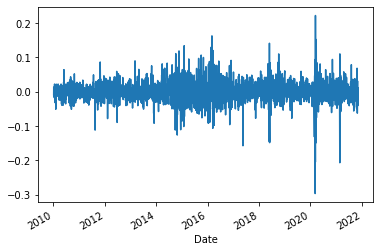

In [28]:
df_st['PETR4.SA'].plot()

In [29]:
adfuller(df_st['PETR4.SA'])

(-16.601133219873788,
 1.7641034287885958e-29,
 8,
 2925,
 {'1%': -3.4325876232778527,
  '5%': -2.862528633231224,
  '10%': -2.567296277039959},
 -12237.426964138958)

In [30]:
# p-value menor que 5% e rejeitamos a hipótese nula que a 
# série não é um random walk com 95% de confiança

p1 = adfuller(df_st['PETR4.SA'])[1]
print('p-value', p1)
if p1<0.05:
    print('É estacionário')
else:
    print('É random walk')

p2 = adfuller(df_st['CIEL3.SA'])[1]
print('p-value', p2)
if p2<0.05:
    print('É estacionário')
else:
    print('É random walk')

p-value 1.7641034287885958e-29
É estacionário
p-value 7.652482912628825e-28
É estacionário


ARIMA -> \
AR -> Auto regressiva \
I -> Integração\
MA -> Media movel

## 3. Autoregressive (AR)

**Modelo AR**

- Conceito: capturar o padrão por trás da time series e prever o comportamento futuro a partir do passado
- Exemplo: sazonalidade anual de vendas

$$R_t = \mu + \phi R_{t-1} + \epsilon_t$$

$$R_t = \phi R_{t-1} + \epsilon_t$$

- $R_t$ => instante presente
- $R_{t-p}$ => passados p lags
- $\phi$ => coeficiente da PACF
- Bom modelo => lags da PACF fora do cone de confiança

- visto que há somente um valor defasado do lado direito, modelo é chamado de AR de ordem 1 ou AR(1)


- $\phi = 1$: random walk
- $\phi = 0$: white noise
- estacionaridade: $-1 < \phi < 1$
- $\phi$ negativo: mean reversion
- $\phi$ positivo: momentum

![](imagens/06_02.PNG)

![](imagens/06_03.PNG)

- AR(1)
$$R_t = \mu + \phi_1 R_{t-1} + \epsilon_t$$

- AR(2)
$$R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \epsilon_t$$

- AR(3)
$$R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \phi_3 R_{t-3} + \epsilon_t$$

**Identificando a ordem do modelo AR**

- partial correlation function (PACF)

![](imagens/06_04.PNG)

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess

In [32]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [33]:
production_ice_cream = pd.read_csv('../datasets/ice_cream.csv',
                                    parse_dates=[0],
                                    date_parser=parser,
                                    index_col=0)

In [34]:
production_ice_cream.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [35]:
production_ice_cream.columns =['production']
production_ice_cream.head()

,production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [36]:
production_ice_cream.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=577, freq=None)

In [37]:
pd.infer_freq(production_ice_cream.index)

'MS'

In [39]:
production_ice_cream = production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index))

In [40]:
production_ice_cream

,production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [41]:
production_ice_cream['1972-01']

,production
DATE,
1972-01-01,59.9622


In [42]:
production_ice_cream = production_ice_cream['2010-01-01':]

<AxesSubplot:xlabel='DATE'>

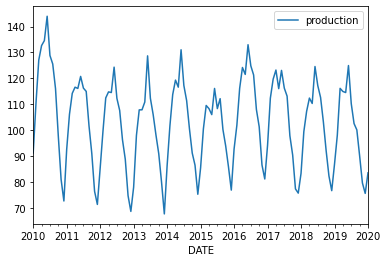

In [45]:
production_ice_cream.plot()

In [46]:
adfuller(production_ice_cream)

(-3.4692068038611277,
 0.00881405532448747,
 13,
 107,
 {'1%': -3.492995948509562,
  '5%': -2.888954648057252,
  '10%': -2.58139291903223},
 623.0126017548499)

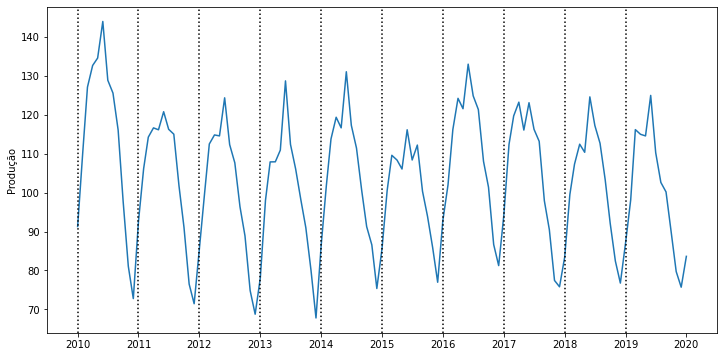

In [47]:
plt.figure(figsize=(12,6))
plt.plot(production_ice_cream)
plt.ylabel('Produção')
# plt.grid(axis='x')
for year in range(2010, 2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle=':')

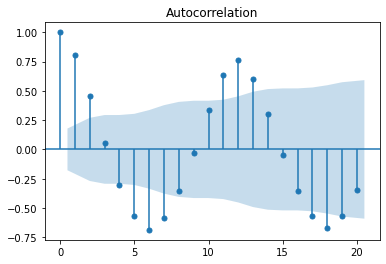

In [48]:
acf_ice = plot_acf(production_ice_cream, lags=20)

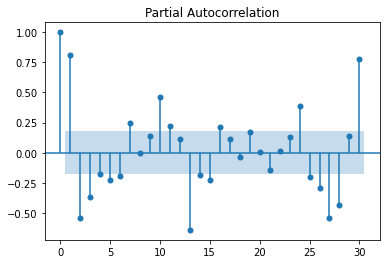

In [51]:
pacf_ice = plot_pacf(production_ice_cream, lags=30)

In [52]:
train_end = datetime(2018, 12, 1) # treino acaba em 2018, começando em 2010
test_end = datetime(2020, 12, 1) # o teste para o modelo (comparação com dados reais) será o finalzinho, de 2018 a 2019

train_data = production_ice_cream[:train_end]
test_data = production_ice_cream[(train_end + timedelta(days=1)):test_end]

In [88]:
model = ARMA(train_data, order=(13,0)).fit()

In [78]:
# res_auto = auto_arima(train_data,
#            error_action='ignore', suppress_warnings=True, seasonal=False)

In [79]:
# res_auto.summary()

In [89]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:             production   No. Observations:                  108
Model:                    ARMA(13, 0)   Log Likelihood                -309.144
Method:                       css-mle   S.D. of innovations              3.919
Date:                Mon, 08 Nov 2021   AIC                            648.287
Time:                        19:52:42   BIC                            688.519
Sample:                    01-01-2010   HQIC                           664.600
                         - 12-01-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               103.8139      1.430     72.576      0.000     101.010     106.617
ar.L1.production      0.8835      0.073     12.065      0.000       0.740       1.027
ar.L2.production      0.

In [90]:
test_data.head()

,production
DATE,
2019-01-01,86.9988
2019-02-01,98.1116
2019-03-01,116.1718
2019-04-01,114.9703
2019-05-01,114.5613


In [91]:
test_data.tail()

,production
DATE,
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223
2019-12-01,75.7094
2020-01-01,83.6290


In [92]:
test_data.index[0]

Timestamp('2019-01-01 00:00:00', freq='MS')

In [93]:
predictions = model.predict(start=test_data.index[0], end=test_data.index[-1])
residuos = test_data['production'] - predictions

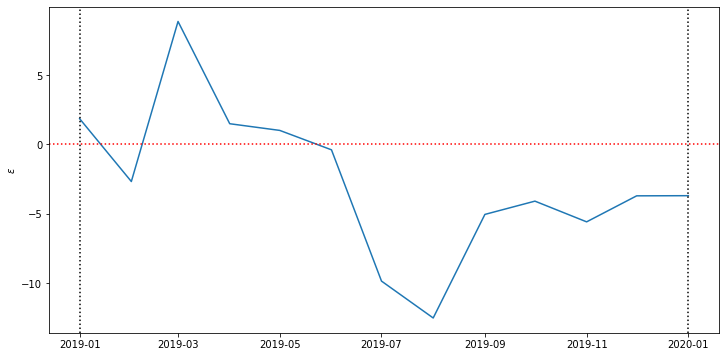

In [94]:
plt.figure(figsize=(12,6))
plt.plot(residuos)
plt.ylabel('$\epsilon$')
plt.axhline(0, color='r', linestyle=':')
for year in range(2019, 2021):
    plt.axvline(pd.to_datetime(
        str(year)+'-01-01'), color='k', linestyle=':')

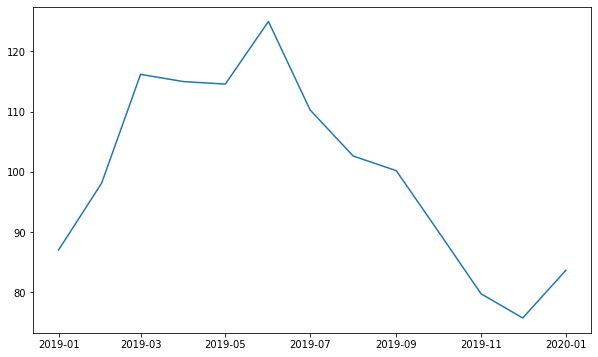

In [95]:
plt.figure(figsize=(10,6))
plt.plot(test_data)


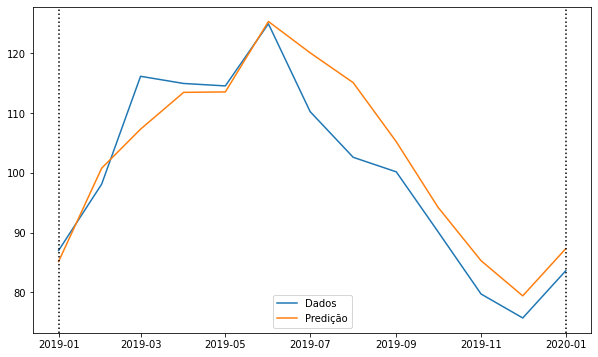

In [96]:
plt.figure(figsize=(10,6))
plt.plot(test_data)
plt.plot(predictions)

plt.legend(['Dados', 'Predição'])
for year in range(2019, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle=':')

plt.show()

In [97]:
print('Mean absolute percent error:', np.mean(abs(residuos/test_data['production'])))

Mean absolute percent error: 0.047639514491835275


In [98]:
print('Root mean squared error:', np.sqrt(np.mean(residuos**2)))

Root mean squared error: 5.857135141901441


## 4. Moving average (MA)

**Modelo MA**

$$R_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$$
$$R_t - \epsilon_t = \mu + \theta \epsilon_{t-1}$$

- visto que há somente um valor defasado do lado direito, modelo é chamado de MA de ordem 1 ou MA(1)
- $\theta$ negativo: reversão média de um período
- $\theta$ positivo: momentum de um período
- correlação de um período é $\frac{\theta}{1+\theta^2}$

![](imagens/06_05.PNG)

- MA(1)
$$R_t = \mu + \epsilon_t - \theta_1\epsilon_{t-1} $$

- MA(2)
$$R_t = \mu + \epsilon_t - \theta_1\epsilon_{t-1} - \theta_2\epsilon_{t-2}$$

- MA(3)
$$R_t = \mu + \epsilon_t - \theta_1\epsilon_{t-1} - \theta_2\epsilon_{t-2} - \theta_3\epsilon_{t-3}$$

In [99]:
ar = np.array([1])
ma = np.array([1, 2, 5, 10]) # tetha = 0.9
ar_object = ArmaProcess(ar, ma)
simulated_data = ar_object.generate_sample(nsample=1000)

simulated_data[:10]

array([  3.23715958,   6.76921014,  17.26137124,  32.85956217,
         1.15403956,  -4.27831135, -19.61362575,   2.81071656,
        10.04720232,  -5.12163958])

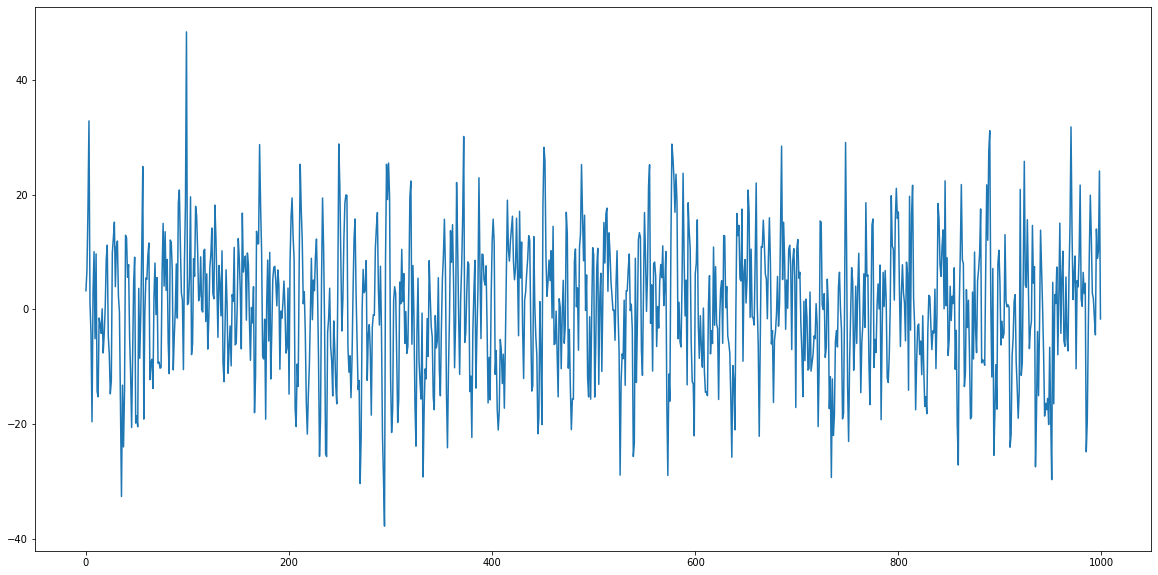

In [100]:
plt.figure(figsize=(20, 10))
plt.plot(simulated_data)

In [102]:
adfuller(simulated_data)

(-15.88527794183477,
 8.664535745574974e-29,
 3,
 996,
 {'1%': -3.4369325637409154,
  '5%': -2.8644462162311934,
  '10%': -2.568317409920808},
 7342.734624002801)

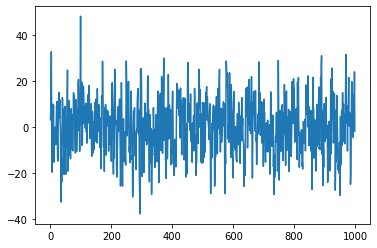

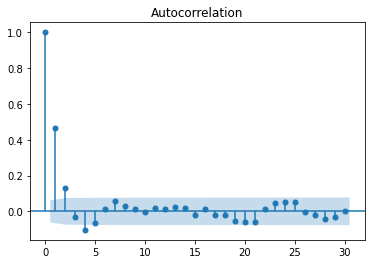

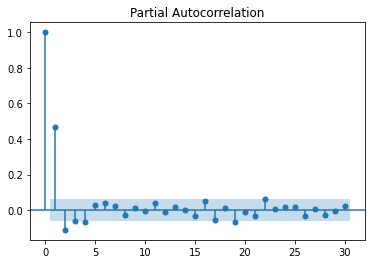

In [101]:
plt.plot(simulated_data)
plt.show()

plot_acf(simulated_data)
plt.show()

plot_pacf(simulated_data)
plt.show()
# ar = np.array([1])
# ma = np.array([1, 2, 5, 10]) # tetha = 0.9

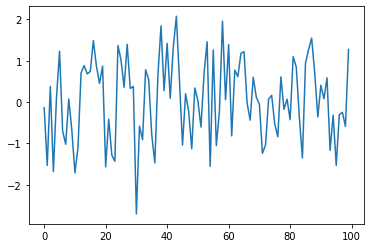

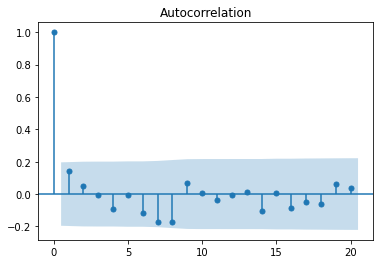

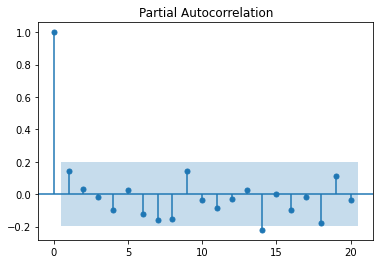

In [105]:
ar = np.array([1])
ma = np.array([1, -0.9])
ar_object = ArmaProcess(ar)
simulated_data = ar_object.generate_sample(nsample=100)

# tetha = -0.9
plt.plot(simulated_data)
plt.show()

plot_acf(simulated_data)
plt.show()

plot_pacf(simulated_data)
plt.show()

In [106]:
adfuller(simulated_data)

(-8.436656749685714,
 1.8090461905928493e-13,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 243.44756147228335)

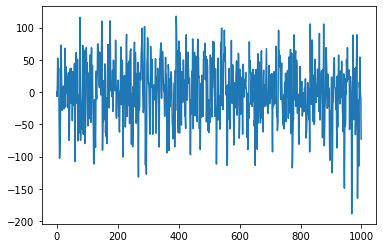

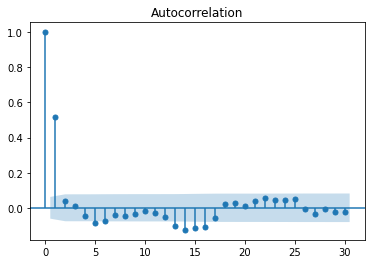

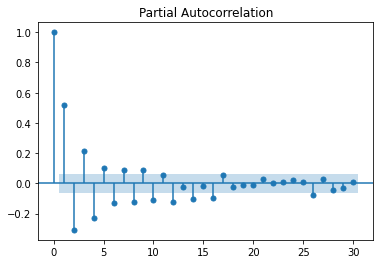

(-9.649462668645596,
 1.447795529999991e-16,
 16,
 983,
 {'1%': -3.4370198458812156,
  '5%': -2.864484708707697,
  '10%': -2.568337912084273},
 9647.276496340472)

In [111]:
ar = np.array([1])
ma = np.array([1, 30, 32])
ar_object = ArmaProcess(ar, ma)
simulated_data = ar_object.generate_sample(nsample=1000)

# tetha = -0.9
plt.plot(simulated_data)
plt.show()

plot_acf(simulated_data)
plt.show()

plot_pacf(simulated_data)
plt.show()
adfuller(simulated_data)

**Previsão com modelo MA**

In [132]:
mod = ARMA(simulated_data, order=(1,1))
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood               -4930.905
Method:                       css-mle   S.D. of innovations             33.486
Date:                Mon, 08 Nov 2021   AIC                           9869.810
Time:                        20:04:54   BIC                           9889.441
Sample:                             0   HQIC                          9877.271
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3604      2.014     -0.179      0.858      -4.307       3.586
ar.L1.y        0.0006      0.036      0.017      0.986      -0.070       0.071
ma.L1.y        0.9013      0.017     53.391      0.000       0.868       0.934
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         1609.2181           +0.0000j         1609.2181            0.0000
MA.1           -1.1096           +0.0000j            1.1096            0.5000
-----------------------------------------------------------------------------
"""

<Figure size 720x288 with 0 Axes>

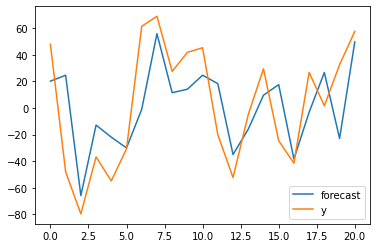

In [133]:
plt.figure(figsize=(10, 4))
result.plot_predict(start=90, end=110)
plt.show()

<Figure size 720x288 with 0 Axes>

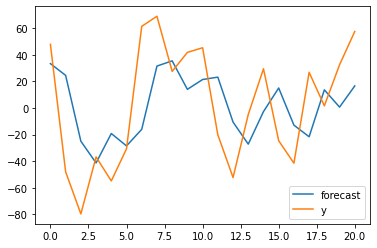

In [131]:
plt.figure(figsize=(10, 4))
result.plot_predict(start=90, end=110)
plt.show()

## 5. Modelos ARMA

![](https://image1.slideserve.com/1710867/slide34-l.jpg)

**Modelo ARMA**

- ARMA(1, 1):
$$R_t = \mu + \phi R_{t-1} + \epsilon_t + \theta \epsilon_{t-1}$$

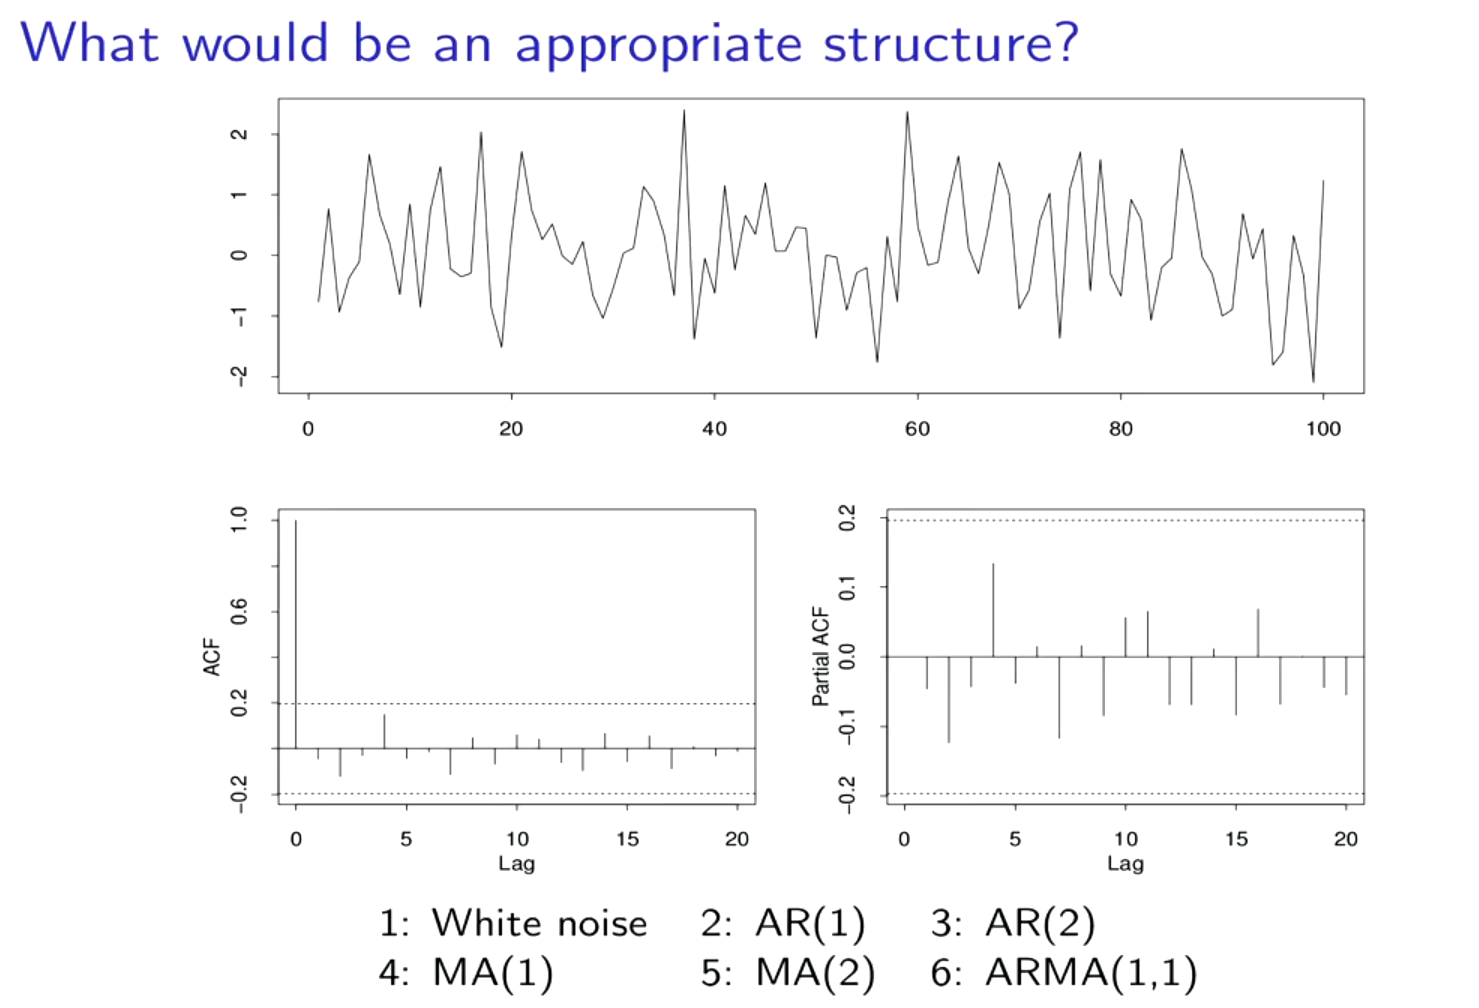

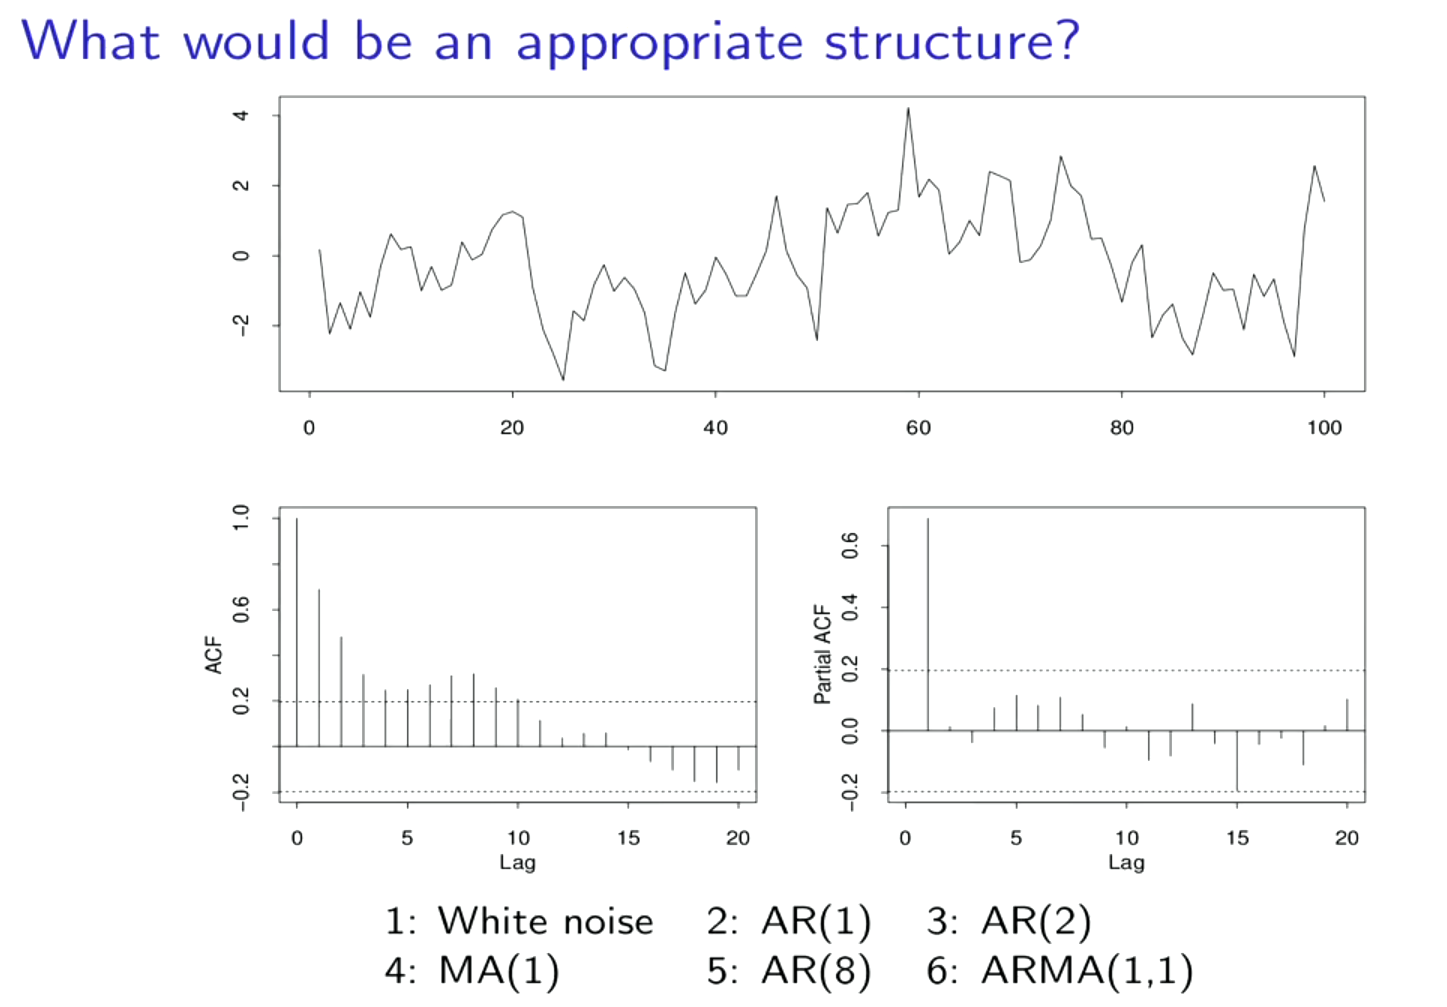

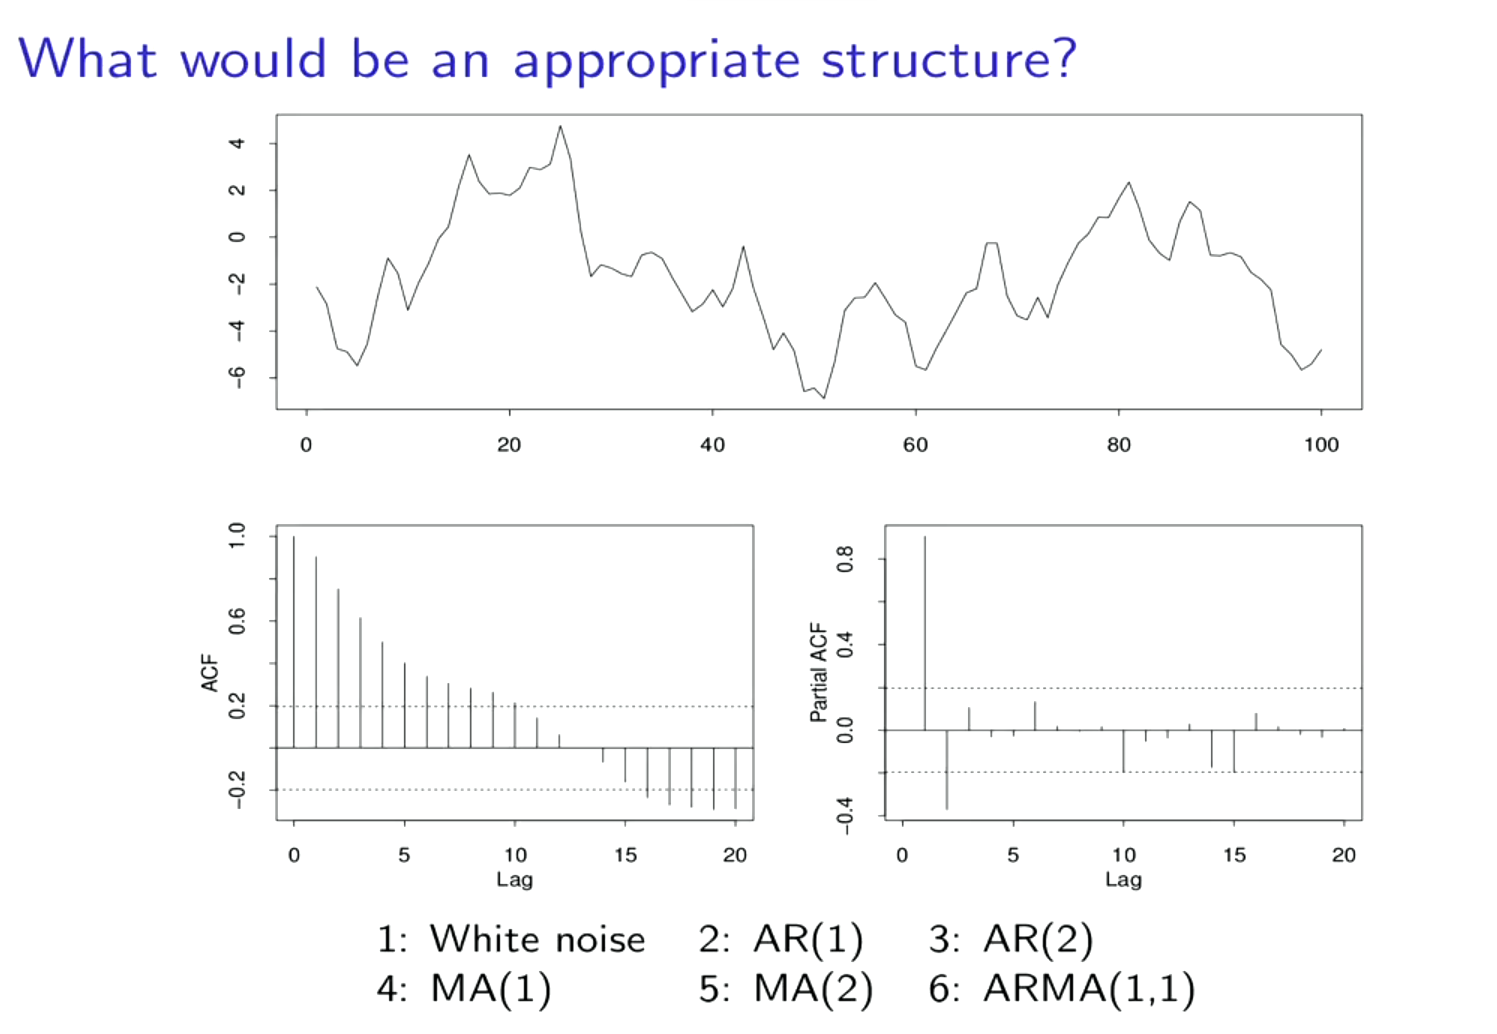

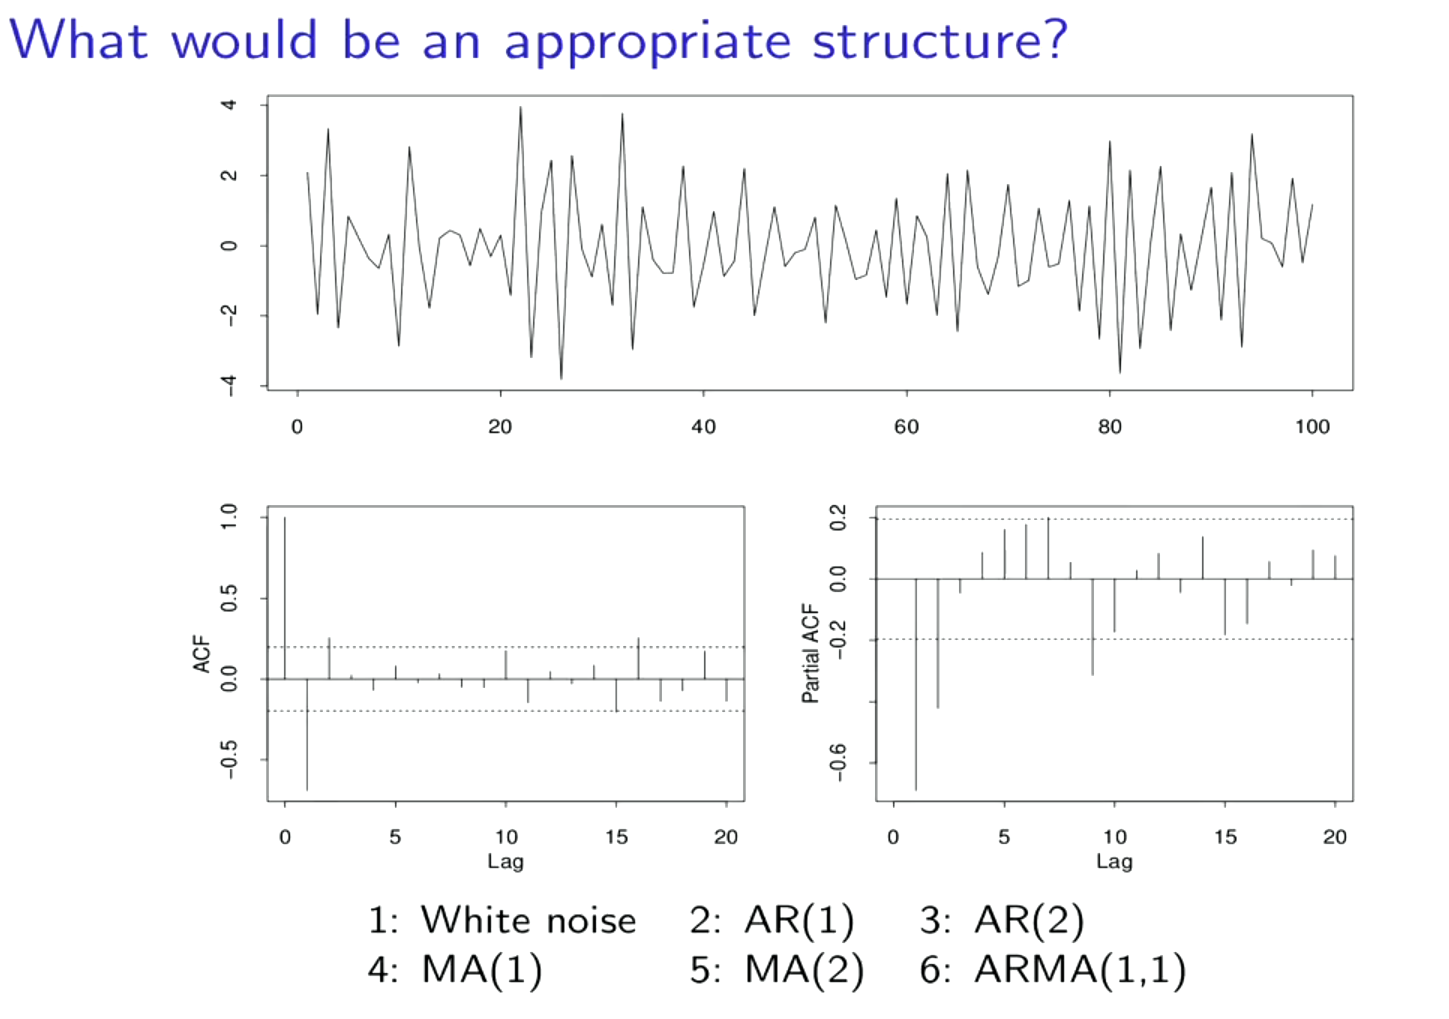

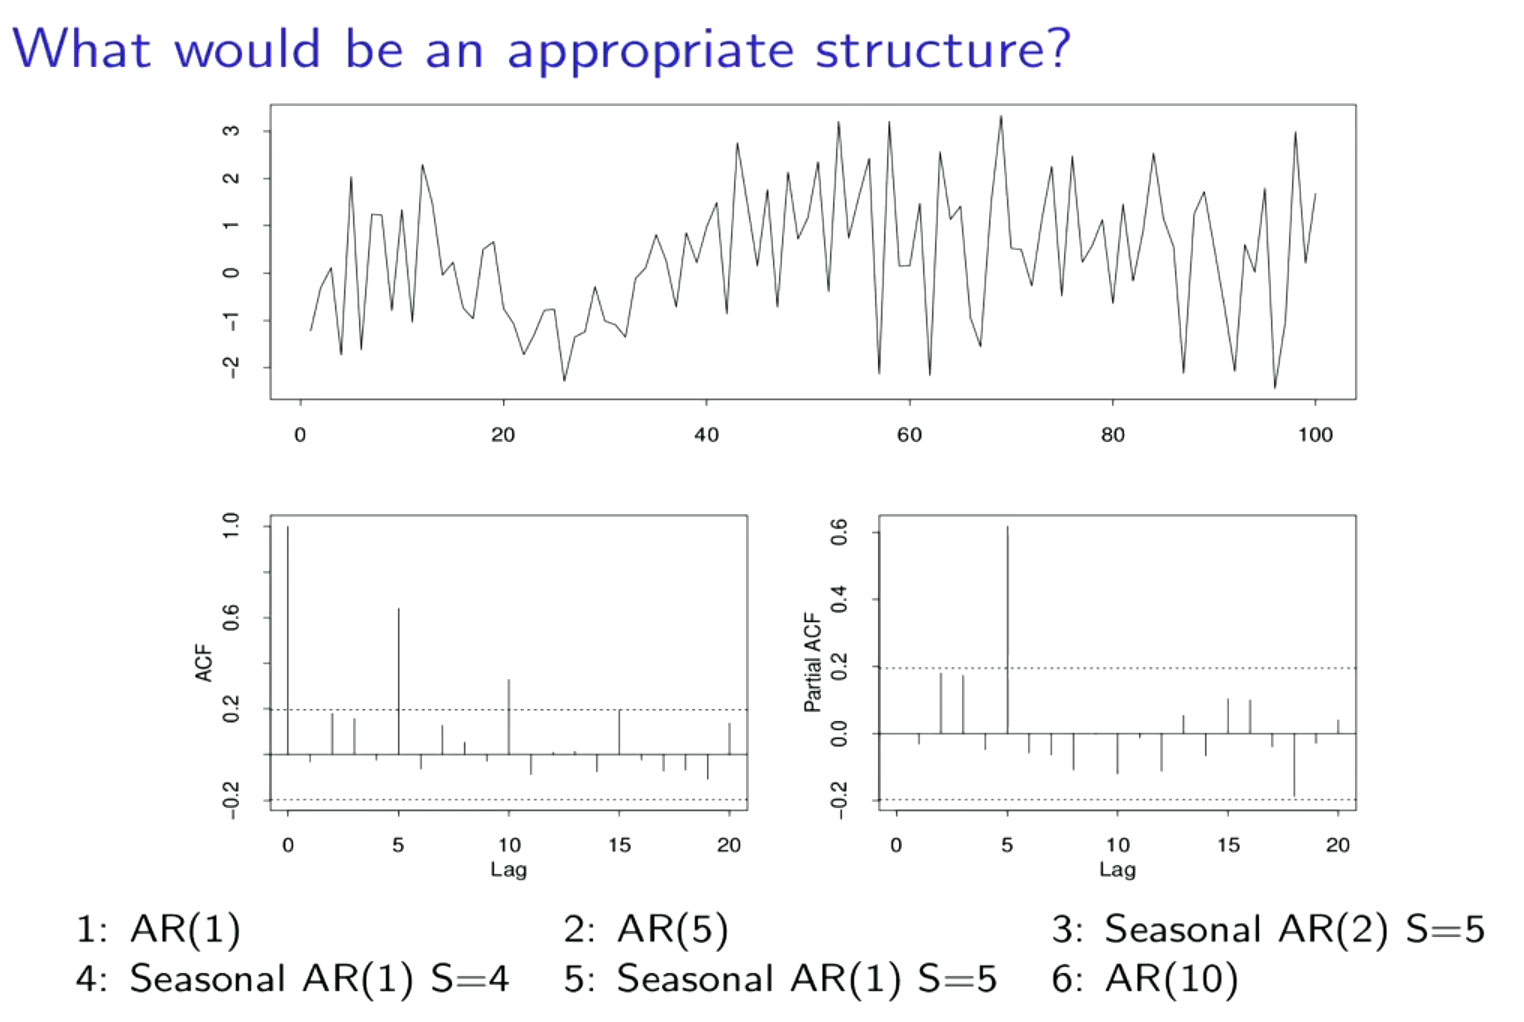

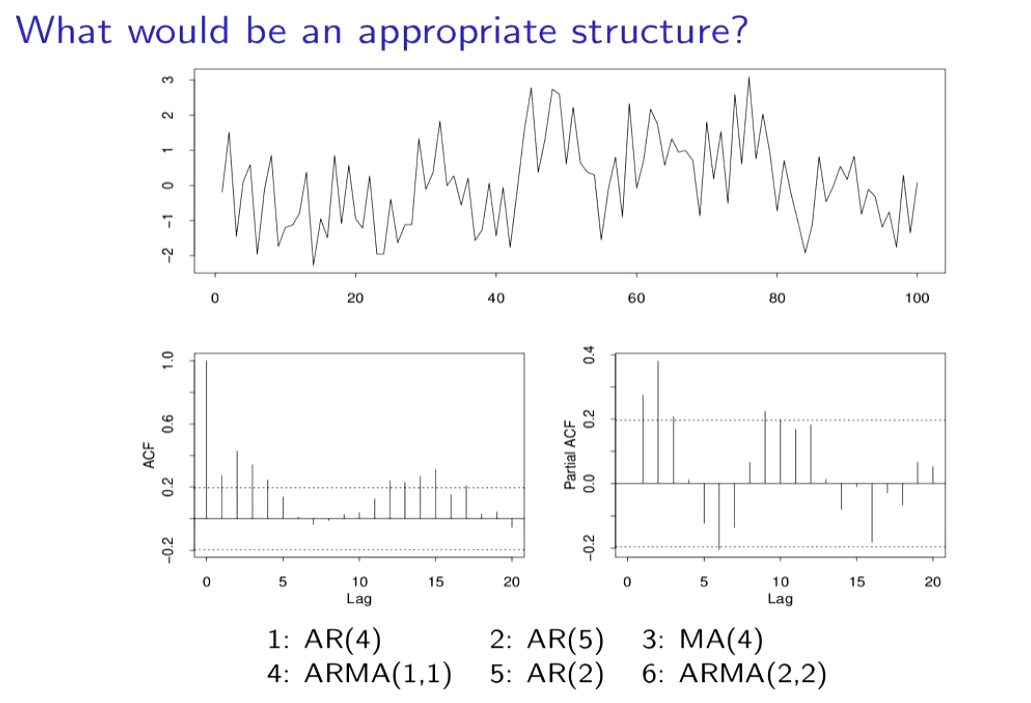

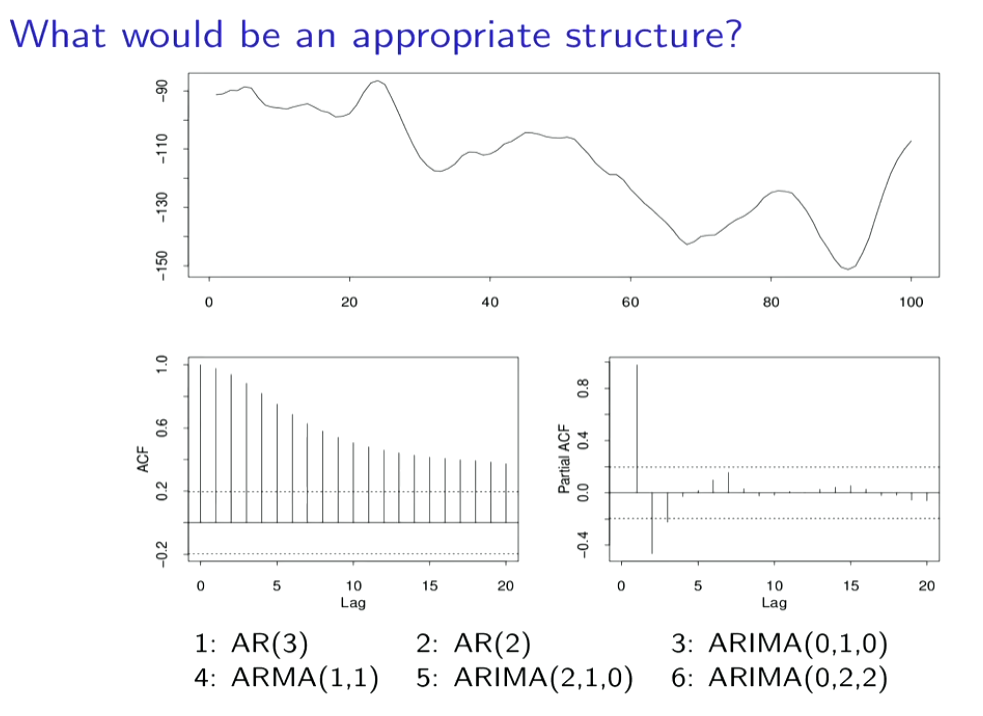

In [135]:
st_btc = 'BTC-USD'
st_eth = 'ETH-USD'

df_cc = pd.DataFrame()

ccs = [st_btc, st_eth]
for cc in ccs:
    df_cc[cc]=DataReader(cc, data_source='yahoo',
                         start='2016-1-1')['Adj Close']

In [136]:
df_cc.head()

,BTC-USD,ETH-USD
Date,,
2016-01-01,434.334015,0.948024
2016-01-02,433.437988,0.937124
2016-01-03,430.010986,0.971905
2016-01-04,433.091003,0.954480
2016-01-05,431.959991,0.950176


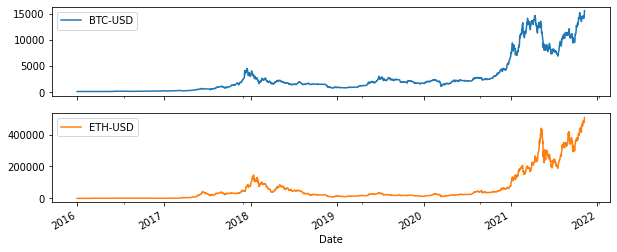

In [137]:
(df_cc / df_cc.iloc[0] * 100).plot(figsize=(10, 4), subplots=True)
plt.show()

In [141]:
df_cc = sm.add_constant(df_cc)
df_cc

,const,BTC-USD,ETH-USD
Date,,,
2016-01-01,1.0,434.334015,0.948024
2016-01-02,1.0,433.437988,0.937124
2016-01-03,1.0,430.010986,0.971905
2016-01-04,1.0,433.091003,0.954480
2016-01-05,1.0,431.959991,0.950176
...,...,...,...
2021-11-04,1.0,61452.230469,4537.324219
2021-11-05,1.0,61125.675781,4486.243164
2021-11-06,1.0,61527.480469,4521.581055


In [142]:
results_ols = sm.OLS(df_cc['BTC-USD'], df_cc[['ETH-USD']]).fit()
print(results_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                BTC-USD   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.768e+04
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                        0.00
Time:                        20:29:40   Log-Likelihood:                         -21739.
No. Observations:                2135   AIC:                                  4.348e+04
Df Residuals:                    2134   BIC:                                  4.349e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [143]:
results_ols = sm.OLS(df_cc['BTC-USD'], df_cc[['const', 'ETH-USD']]).fit()
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                BTC-USD   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:29:40   Log-Likelihood:                -21558.
No. Observations:                2135   AIC:                         4.312e+04
Df Residuals:                    2133   BIC:                         4.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2992.3210    150.741     19.851      0.0

In [144]:
results_ols.params

const      2992.321011
ETH-USD      15.623984
dtype: float64

In [145]:
# bitcoin e ethereum são cointegradas com 10% de confiança
b = results_ols.params[1]
adf_stats = adfuller(df_cc['BTC-USD'] - b * df_cc['ETH-USD'])
print('p-value: ', adf_stats[1])

p-value:  0.012667331170477952


**Case**

In [155]:
st_croil = 'CL=F'
st_goll4 = 'GOLL4.SA'

df_st = pd.DataFrame()

stocks = [st_croil, st_goll4]
for stock in stocks:
    df_st[stock]=DataReader(stock, data_source='yahoo',
                            start='2010-1-1')['Adj Close']

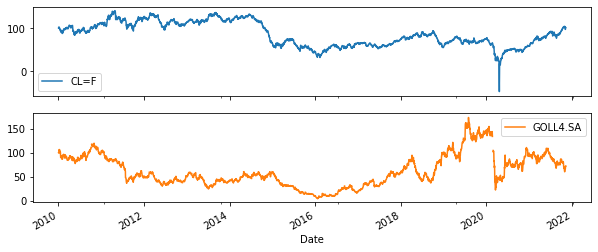

In [156]:
(df_st / df_st.iloc[0] * 100).plot(figsize=(10, 4), subplots=True)
plt.show()

In [157]:
df_st.ffill(inplace=True)

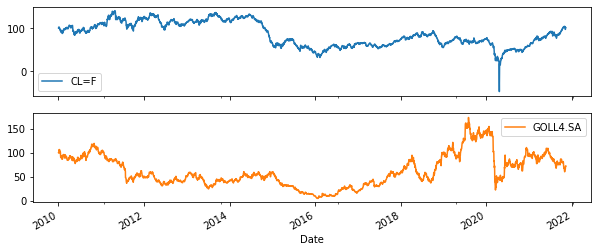

In [158]:
(df_st / df_st.iloc[0] * 100).plot(figsize=(10, 4), subplots=True)
plt.show()

In [159]:
df_st

,CL=F,GOLL4.SA
Date,,
2010-01-04,81.510002,25.250458
2010-01-05,81.769997,25.039238
2010-01-06,83.180000,25.327267
2010-01-07,82.660004,25.596092
2010-01-08,82.750000,26.834614
...,...,...
2021-11-02,83.910004,16.450001
2021-11-03,80.860001,17.549999
2021-11-04,78.809998,16.920000


In [160]:
# dados parecem seguir um random walk
for col in df_st.columns:
    print(f'P-value de {col} é {adfuller(df_st[col])[1]}; ou seja, é estacionária? {adfuller(df_st[col])[1]<0.05}')

P-value de CL=F é 0.44140893799663616; ou seja, é estacionária? False
P-value de GOLL4.SA é 0.14135380507182438; ou seja, é estacionária? False


In [161]:
df_st = df_st.diff().dropna()

In [162]:
df_st

,CL=F,GOLL4.SA
Date,,
2010-01-05,0.259995,-0.211220
2010-01-06,1.410004,0.288029
2010-01-07,-0.519997,0.268826
2010-01-08,0.089996,1.238522
2010-01-11,-0.230003,0.076807
...,...,...
2021-11-02,-0.139999,0.000000
2021-11-03,-3.050003,1.099998
2021-11-04,-2.050003,-0.629999


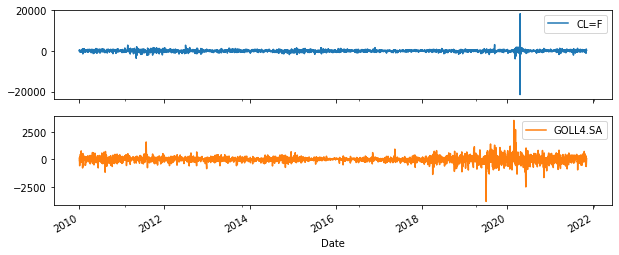

In [163]:
(df_st / df_st.iloc[0] * 100).plot(figsize=(10, 4), subplots=True)
plt.show()

In [164]:
# dados parecem seguir um random walk
for col in df_st.columns:
    print(f'P-value de {col} é {adfuller(df_st[col])[1]}; ou seja, é estacionária? {adfuller(df_st[col])[1]<0.05}')

P-value de CL=F é 1.4402392300014995e-29; ou seja, é estacionária? True
P-value de GOLL4.SA é 0.0; ou seja, é estacionária? True


==================== CL=F ====================


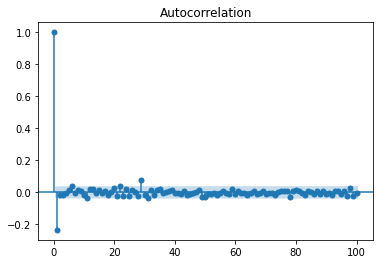

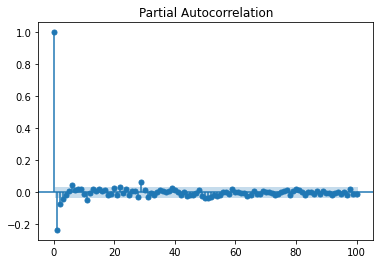


==================== GOLL4.SA ====================


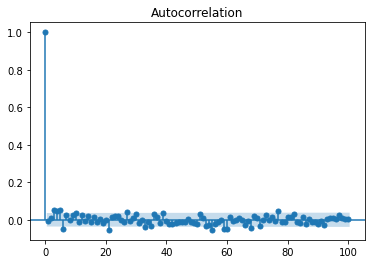

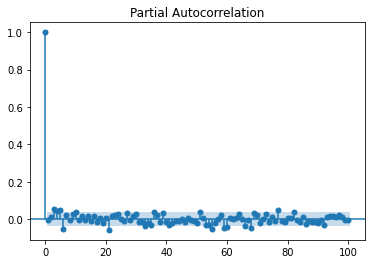

In [165]:
for col in df_st.columns:
    print('='*20, col, '='*20)
    plot_acf(df_st[col], lags=100)
    plt.show()
    plot_pacf(df_st[col], lags=100)
    plt.show()
    print()

### Vivo

In [174]:
df_vivt4 = DataReader('VIVT3.SA', data_source='yahoo',
                      start='2010-1-1')['Adj Close']

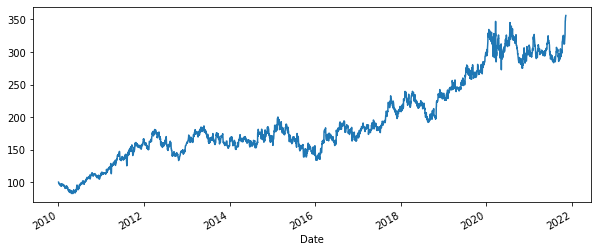

In [175]:
(df_vivt4 / df_vivt4.iloc[0] * 100).plot(figsize=(10, 4))
plt.show()

In [176]:
print(f'P-valor é {adfuller(df_vivt4)[1]}')

P-valor é 0.950415761676277


In [180]:
df_vivt4.head()

Date
2010-01-04    14.266816
2010-01-05    14.213953
2010-01-06    13.972267
2010-01-07    13.972267
2010-01-08    13.960941
Name: Adj Close, dtype: float64

In [178]:
df_vivt4.diff().head()

Date
2010-01-04         NaN
2010-01-05   -0.052863
2010-01-06   -0.241686
2010-01-07    0.000000
2010-01-08   -0.011326
Name: Adj Close, dtype: float64

In [183]:
df_vivt4_d = df_vivt4.diff().dropna()
print(f'P-valor é {adfuller(df_vivt4_d)[1]}')

P-valor é 1.4014004586521619e-27


<AxesSubplot:xlabel='Date'>

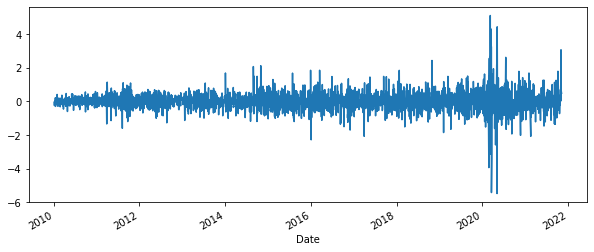

In [185]:
df_vivt4_d.plot(figsize=(10, 4))

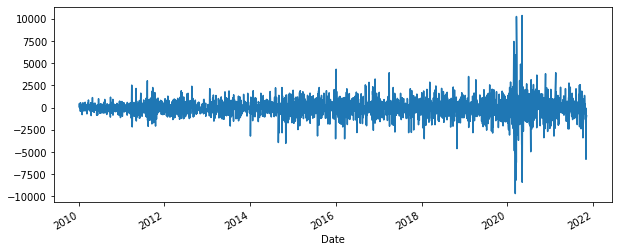

In [186]:
(df_vivt4_d / df_vivt4_d.iloc[0] * 100).plot(figsize=(10, 4))
plt.show()

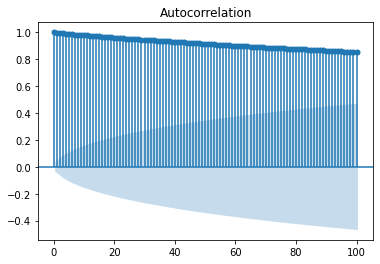

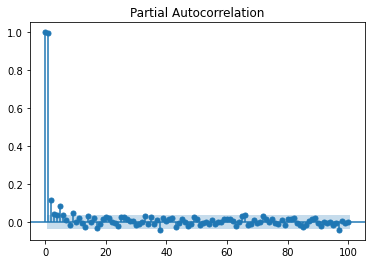

In [172]:
plot_acf(df_vivt4, lags=100)
plt.show()
plot_pacf(df_vivt4, lags=100)
plt.show()

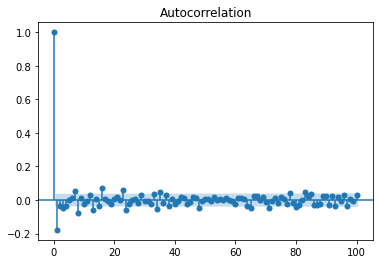

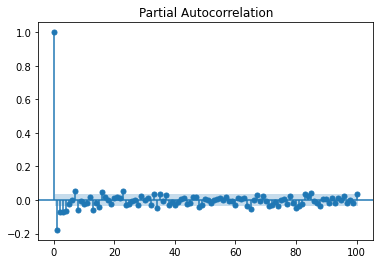

In [188]:
plot_acf(df_vivt4_d, lags=100)
plt.show()
plot_pacf(df_vivt4_d, lags=100)
plt.show()

## Akaike Information Criterion (AIC)
$$AICp=−2log(Lp)+2[(p+1)+1]$$
## Critério de Informação Bayesiano (BIC)
$$BICp=−2log(Lp)+[(p+1)+1]log(n).$$

$Lp$ é a função de máxima verossimilhança do modelo e $p$ é o número de variáveis explicativas consideradas no modelo.
- AIC e BIC mais baixo => melhor modelo

In [190]:
import warnings

warnings.simplefilter('ignore')

In [191]:
ls_ar, ls_ma, ls_aic, ls_bic = [], [], [], []

for ar in range(0, 3):
    for ma in range(0, 3):
        mod = ARMA(df_vivt4, order=(ar, ma))
        res = mod.fit()
        
        ls_ar.append(ar)
        ls_ma.append(ma)
        ls_aic.append(res.aic)
        ls_bic.append(res.bic)

In [192]:
df_ic = pd.DataFrame({'AR': ls_ar, 'MA': ls_ma,
                      'AIC': ls_aic, 'BIC': ls_bic})

In [194]:
df_ic.sort_values(['AIC', 'BIC'])

,AR,MA,AIC,BIC
8,2,2,4749.888315,4785.795092
7,2,1,4750.274320,4780.196633
5,1,2,4758.953419,4788.875733
4,1,1,4768.146765,4792.084616
6,2,0,4781.877445,4805.815296
3,1,0,4872.986471,4890.939859
2,0,2,14499.929737,14523.867588
1,0,1,17366.455394,17384.408782
0,0,0,21164.948588,21176.917514


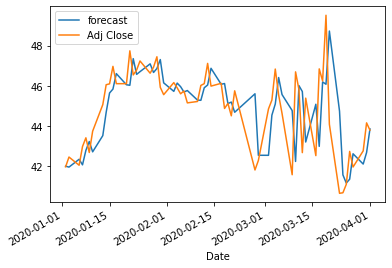

In [195]:
mod = ARMA(df_vivt4, order=(2, 2)).fit()
res.plot_predict(start='2020-01', end='2020-04')
plt.show()

## 6. Modelos ARIMA

- p: número de defasagens autoregressivas
- d: ordem da diferença das defasagens
- q: número de defasagens das médias móveis

In [196]:
from statsmodels.tsa.arima_model import ARIMA

In [213]:
ls_i, ls_ar, ls_ma, ls_aic, ls_bic = [], [], [], [], []

for ar in range(0, 3):
    for ma in range(0, 3):
        for i in range(0, 2):
            mod = ARIMA(df_vivt4, order=(ar, i, ma))
            res = mod.fit()

            ls_ar.append(ar)
            ls_ma.append(ma)
            ls_i.append(i)
            ls_aic.append(res.aic)
            ls_bic.append(res.bic)

df_ic = pd.DataFrame({'AR': ls_ar, 'I': ls_i ,'MA': ls_ma,
                      'AIC': ls_aic, 'BIC': ls_bic})
df_ic.sort_values(['BIC', 'AIC'])

,AR,I,MA,AIC,BIC
9,1,1,1,4736.906199,4760.842687
15,2,1,1,4735.804797,4765.725406
11,1,1,2,4736.135832,4766.056442
5,0,1,2,4746.223669,4770.160157
17,2,1,2,4737.275997,4773.180729
3,0,1,1,4755.975736,4773.928102
14,2,0,1,4750.274320,4780.196633
13,2,1,0,4758.334974,4782.271462
16,2,0,2,4749.888315,4785.795092
7,1,1,0,4770.187493,4788.139859


In [214]:
mod = ARIMA(df_vivt4, order=(1, 1, 1))
res = mod.fit()

In [215]:
# mesmo aic e bic
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 2934
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2364.453
Method:                       css-mle   S.D. of innovations              0.542
Date:                Mon, 08 Nov 2021   AIC                           4736.906
Time:                        20:52:40   BIC                           4760.843
Sample:                             1   HQIC                          4745.526
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0123      0.007      1.841      0.066      -0.001       0.025
ar.L1.D.Adj Close     0.4199      0.073      5.724      0.000       0.276       0.564
ma.L1.D.Adj Close    -0.6132      0.065     -9.503      0.000      -0.740      -0.487
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3813           +0.0000j            2.3813            0.0000
MA.1            1.6309           +0.0000j            1.6309            0.0000
-----------------------------------------------------------------------------
"""

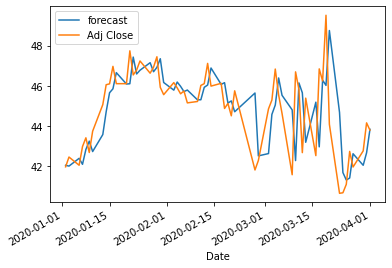

In [216]:
res.plot_predict(start='2020-01', end='2020-04')
plt.show()

In [217]:
df_vivt4.index[2463]

Timestamp('2019-12-06 00:00:00')

In [218]:
df_vivt4.index[2524]

Timestamp('2020-03-11 00:00:00')

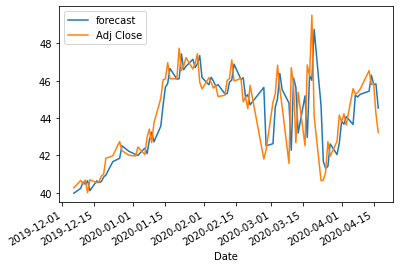

In [226]:
res.plot_predict(start=2463, end=2550)
plt.show()

<AxesSubplot:xlabel='Date'>

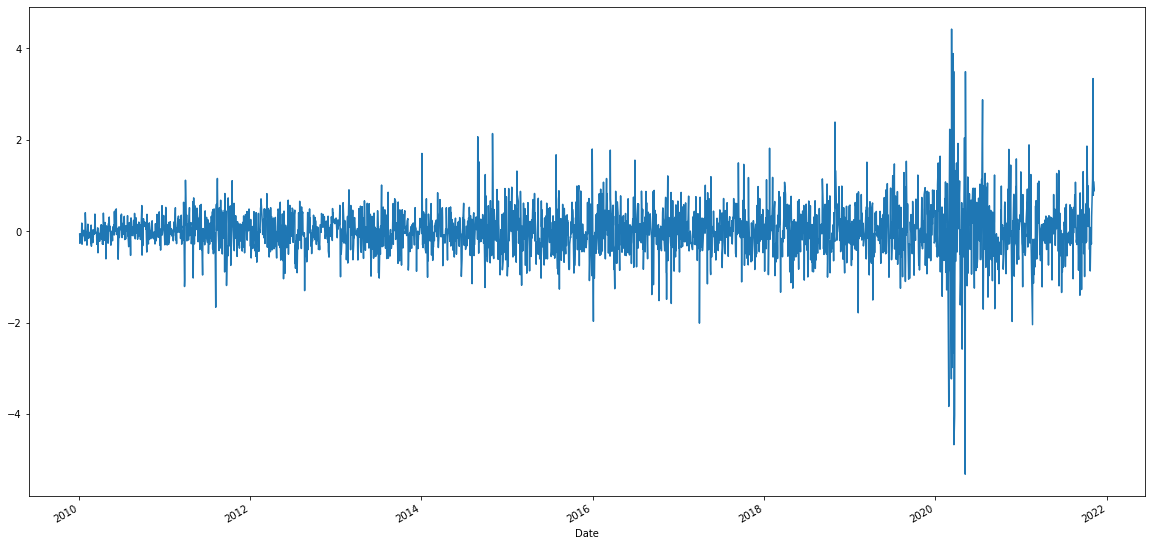

In [220]:
res.resid.plot(figsize=(20,10))

In [227]:
q1 =res.resid.quantile(0.25)
q3 = res.resid.quantile(0.75)

iqr = q3-q1

res.resid[(res.resid <= q1-1.5*iqr) | (res.resid > q3 + 1.5*iqr)]

Date
2011-03-28   -1.210037
2011-03-29   -1.072003
2011-04-01    1.114109
2011-08-08   -1.663429
2011-08-15    1.152861
                ...   
2021-09-22    1.302940
2021-10-08    1.860448
2021-11-01    1.141802
2021-11-03    3.336256
2021-11-05    1.087512
Length: 137, dtype: float64

In [229]:
res.resid[(res.resid <= q1-1.5*iqr) | (res.resid > q3 + 1.5*iqr)].index

DatetimeIndex(['2011-03-28', '2011-03-29', '2011-04-01', '2011-08-08',
               '2011-08-15', '2011-09-23', '2011-10-17', '2012-05-23',
               '2012-08-21', '2014-01-03',
               ...
               '2021-06-22', '2021-08-10', '2021-08-20', '2021-09-08',
               '2021-09-15', '2021-09-22', '2021-10-08', '2021-11-01',
               '2021-11-03', '2021-11-05'],
              dtype='datetime64[ns]', name='Date', length=137, freq=None)

In [230]:
df = df_vivt4[res.resid[(res.resid > q1-1.5*iqr) & (res.resid < q3 + 1.5*iqr)].index]

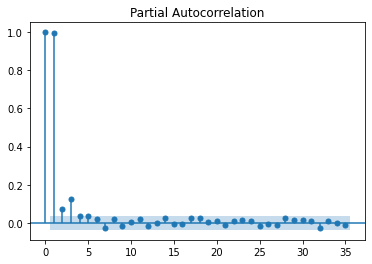

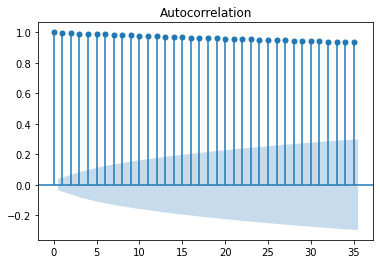

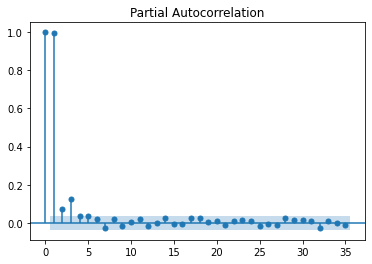

In [232]:
plot_acf(df)
plot_pacf(df)

In [233]:
mod = ARIMA(df_vivt4, order=(1, 1, 1))
res = mod.fit()

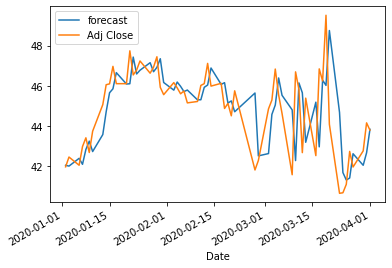

In [234]:
res.plot_predict(start='2020-01', end='2020-04')
plt.show()

### 7. Auto Arima

In [235]:
from pmdarima.arima import auto_arima


In [241]:
res_auto = auto_arima(df_vivt4,
           error_action='ignore', suppress_warnings=True, seasonal=False, m=1,
           information_criterion='bic', max_d=5, max_p=5, max_q=5,
           start_p=0, start_q=0, trace=False)

In [242]:
res_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2935
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2366.133
Date:                Mon, 08 Nov 2021   AIC                           4738.267
Time:                        21:03:22   BIC                           4756.219
Sample:                             0   HQIC                          4744.732
                               - 2935                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4122      0.036     11.411      0.000       0.341       0.483
ma.L1         -0.6047      0.036    -16.804      0.000      -0.675      -0.534
sigma2         0.2937      0.003     91.500      0.000       0.287       0.300
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):             19313.55
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               5.08   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

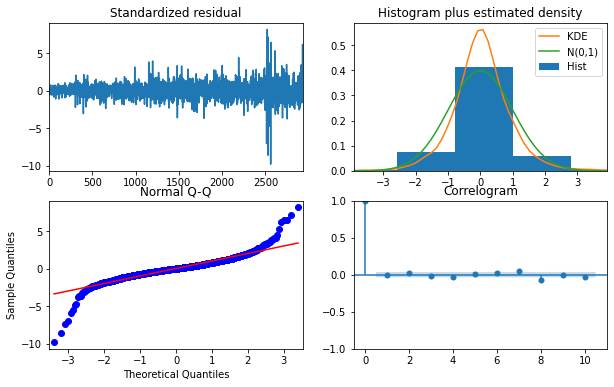

In [246]:
a = res_auto.plot_diagnostics(figsize=(10, 6))

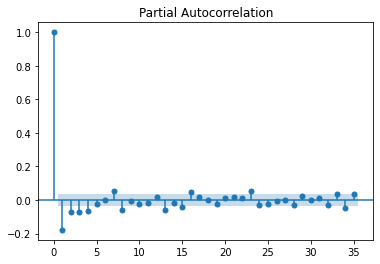

In [247]:
pac = plot_pacf(df_vivt4.diff().dropna())

## 7. Modelos ARIMAX

**ARMA exógeno**

- utiliza variáveis externas
$$ARMAX = ARMA + regressão linear$$

In [248]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

In [249]:
df_flights = sns.load_dataset('flights')

In [250]:
df_flights.index = pd.date_range('1949-01', 
                                 periods=len(df_flights), freq='M')
df_flights.drop(['year', 'month'], axis=1, inplace=True)

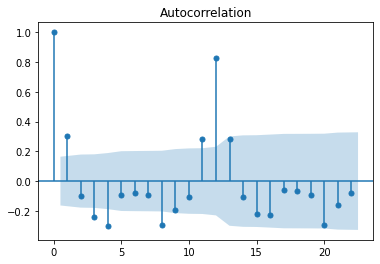

In [251]:
plot_acf(df_flights.diff().dropna())
plt.show()

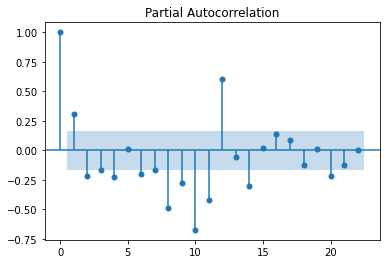

In [252]:
plot_pacf(df_flights.diff().dropna())
plt.show()

In [254]:
model = SARIMAX(df_flights, order=(1, 1, 1), trend='c')

In [255]:
results = model.fit()

In [256]:
fcst = results.get_prediction(start=-25)

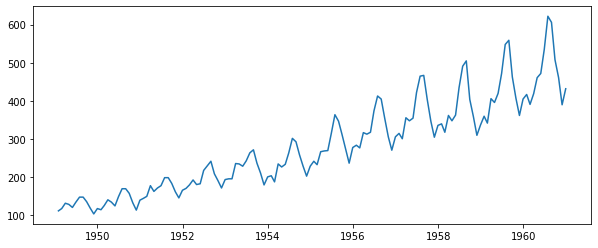

In [257]:
plt.figure(figsize=(10, 4))
plt.plot(df_flights)


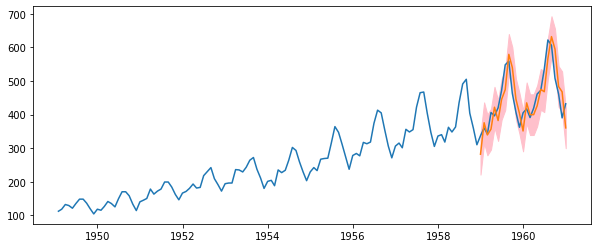

In [258]:
plt.figure(figsize=(10, 4))
plt.plot(df_flights)
plt.plot(fcst.predicted_mean)
plt.fill_between(fcst.conf_int().index,
                 fcst.conf_int().iloc[:,0],
                 fcst.conf_int().iloc[:,1], color='pink')
plt.show()

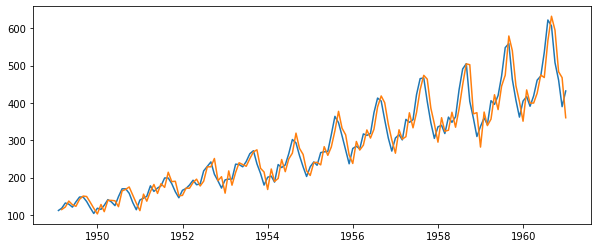

In [266]:
var_nova = results.get_prediction(start=-143)
plt.figure(figsize=(10, 4))
plt.plot(df_flights)
plt.plot(var_nova.predicted_mean)
# plt.fill_between(fcst.conf_int().index,
#                  fcst.conf_int().iloc[:,0],
#                  fcst.conf_int().iloc[:,1], color='pink')
plt.show()

<AxesSubplot:>

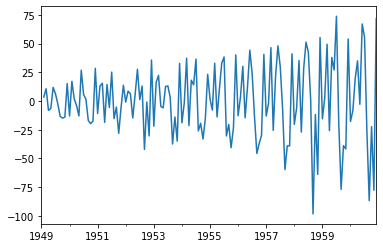

In [273]:
(df_flights['passengers'] - var_nova.predicted_mean).plot()

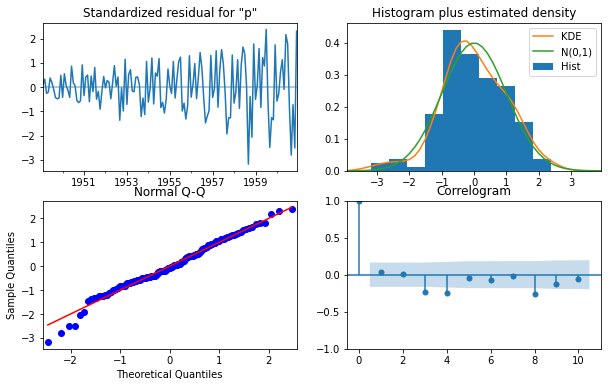

In [261]:
results.plot_diagnostics(figsize=(10, 6))
plt.show()

In [262]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             passengers   No. Observations:                  144
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -694.060
Date:                Mon, 08 Nov 2021   AIC                           1396.121
Time:                        21:08:39   BIC                           1407.972
Sample:                    01-31-1949   HQIC                          1400.937
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6187      5.001      0.724      0.469      -6.183      13.421
ar.L1         -0.4768      0.128     -3.736      0.000      -0.727      -0.227
ma.L1          0.8646      0.080     10.746      0.000       0.707       1.022
sigma2       958.4115    107.040      8.954      0.000     748.616    1168.207
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.64   Prob(JB):                         0.34
Heteroskedasticity (H):               7.01   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### References

[ARIMA Model – Complete Guide to Time Series Forecasting in Python](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

[Understanding ARIMA (Time Series Modeling)](https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8)